In [1]:
# !pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression, Ridge
# import warnings
# warnings.filterwarings('ignore')

In [3]:
train = pd.read_csv("train.csv")
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [4]:
test = pd.read_csv("test.csv")
test.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [6]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


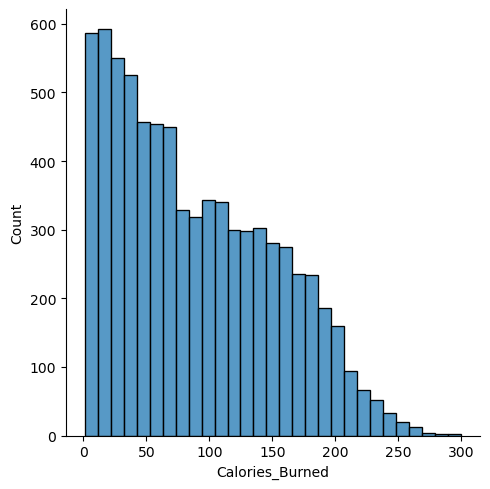

In [7]:
sns.displot(train['Calories_Burned'])
plt.show()

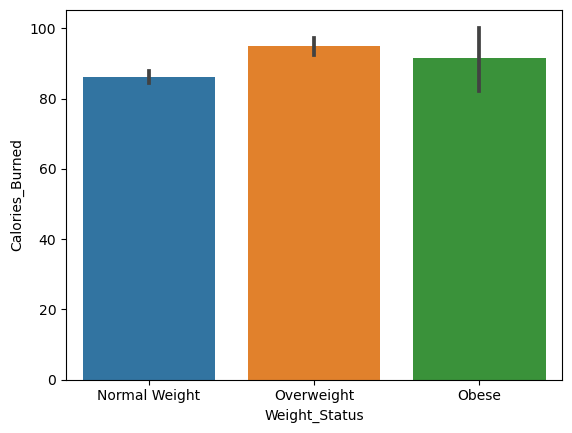

In [8]:
# barplot은 기본적으로 각 데이터의 평균을 보여줍니다. 
sns.barplot(x = train['Weight_Status'], y = train['Calories_Burned'])
plt.show()

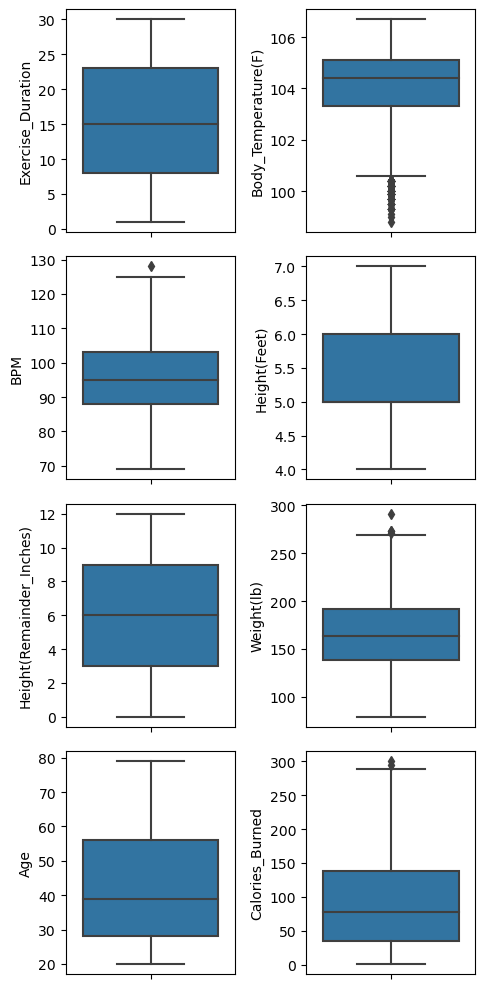

In [9]:
fig, axes = plt.subplots(4,2, figsize = (5,10))

sns.boxplot(y = train['Exercise_Duration'], ax = axes[0][0])
sns.boxplot(y = train['Body_Temperature(F)'], ax = axes[0][1])

sns.boxplot(y = train['BPM'], ax = axes[1][0])
sns.boxplot(y = train['Height(Feet)'], ax = axes[1][1])

sns.boxplot(y = train['Height(Remainder_Inches)'], ax = axes[2][0])
sns.boxplot(y = train['Weight(lb)'], ax = axes[2][1])

sns.boxplot(y = train['Age'], ax = axes[3][0])
sns.boxplot(y = train['Calories_Burned'], ax = axes[3][1])

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13372\716568185.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap = 'Blues')


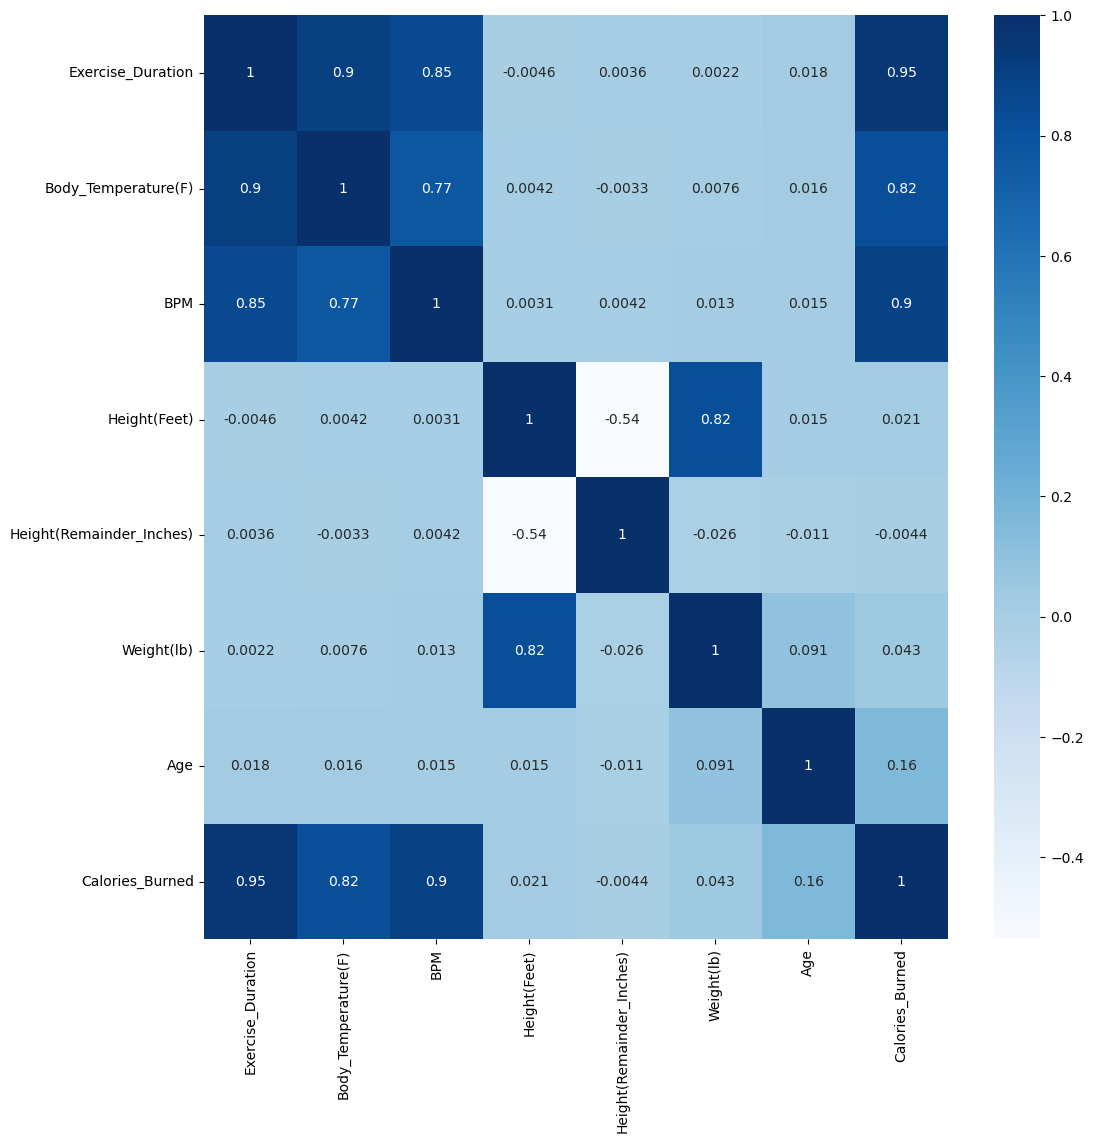

In [10]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

# 분석시작

In [11]:
# !pip install statsmodels

In [12]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [13]:
print("train.shape : ",train.shape)

train.shape :  (7500, 11)


# 데이터 전처리

In [14]:
#상수 하나 추가해주기
# train = sm.add_constant(train,has_constant="add")
print(train.dtypes)

ID                           object
Exercise_Duration           float64
Body_Temperature(F)         float64
BPM                         float64
Height(Feet)                float64
Height(Remainder_Inches)    float64
Weight(lb)                  float64
Weight_Status                object
Gender                       object
Age                           int64
Calories_Burned             float64
dtype: object


In [15]:
featureColums = list(train.columns)
featureColums2 = list(train.columns.difference(["ID"]))
featureColums2

['Age',
 'BPM',
 'Body_Temperature(F)',
 'Calories_Burned',
 'Exercise_Duration',
 'Gender',
 'Height(Feet)',
 'Height(Remainder_Inches)',
 'Weight(lb)',
 'Weight_Status']

In [16]:
# ID는 분석하는데에 필요하지 않은 column값이므로 drop시킴
x = train[featureColums2].drop(["Calories_Burned"],axis=1,inplace=False)
y = train.Calories_Burned

In [17]:
# 범주형 중 순서형 변수인 Weight Status의 분포 파악
x["Weight_Status"].value_counts()

Normal Weight    4681
Overweight       2614
Obese             205
Name: Weight_Status, dtype: int64

In [18]:
# 범주형 중 명목형 변수인 Gender의 분포파악
x["Gender"].value_counts()

F    3769
M    3731
Name: Gender, dtype: int64

In [19]:
#범주형 변수 처리해주기
x["Weight_Status"] = x["Weight_Status"].replace(['Normal Weight','Overweight','Obese'],[1,2,3])
x["Gender"] = x["Gender"].replace(['M','F'],[1,2])

In [20]:
#Height값을 inch로 통합하는데, 소수점 나머지 inch값도 같이 포함시켜줌
x['Height(inch)'] = x['Height(Feet)'] * 12 + x['Height(Remainder_Inches)']

In [21]:
# 키와 체중으로 비만율인 BMI변수 추가해보기
x['BMI'] = (x['Weight(lb)'] / x['Height(inch)'] ** 2) * 703
# BMR은 기초대사량인데, 운동과 관련이 있을까 해서 추가함
x['BMR'] = 10 * x['Weight(lb)'] * 0.453592 + 6.25 * x['Height(inch)'] * 2.54 - 5 * x['Age'] + x['Gender'].apply(lambda x: 5 if x=='M' else -161)

In [22]:
# Height는 feet->inch로 변경하였고, remainder_inches는 이제 불필요한 값이므로 데이터프레임에서 삭제해준다
x = x.drop(['Height(Feet)', 'Height(Remainder_Inches)'], axis=1)

In [23]:
#명목형 변수 ->
x

,Age,BPM,Body_Temperature(F),Exercise_Duration,Gender,Weight(lb),Weight_Status,Height(inch),BMI,BMR
0,45,107.0,105.6,26.0,2,154.3,1,69.0,22.783638,1409.267456
1,50,88.0,103.3,7.0,1,224.9,2,78.0,25.986966,1847.378408
2,29,86.0,103.3,7.0,1,218.3,2,75.0,27.282649,1874.816336
3,33,99.0,104.0,17.0,2,147.7,1,66.0,23.836800,1391.705384
4,38,88.0,102.7,9.0,1,169.8,1,70.0,24.361102,1530.449216
...,...,...,...,...,...,...,...,...,...,...
7495,75,104.0,105.1,22.0,2,112.4,1,58.0,23.489061,894.587408
7496,21,104.0,105.3,20.0,2,147.7,1,68.0,22.455255,1483.455384
7497,57,90.0,103.1,8.0,1,202.8,2,74.0,26.035135,1648.634576
7498,35,97.0,104.4,12.0,1,167.6,2,69.0,24.747490,1519.595192


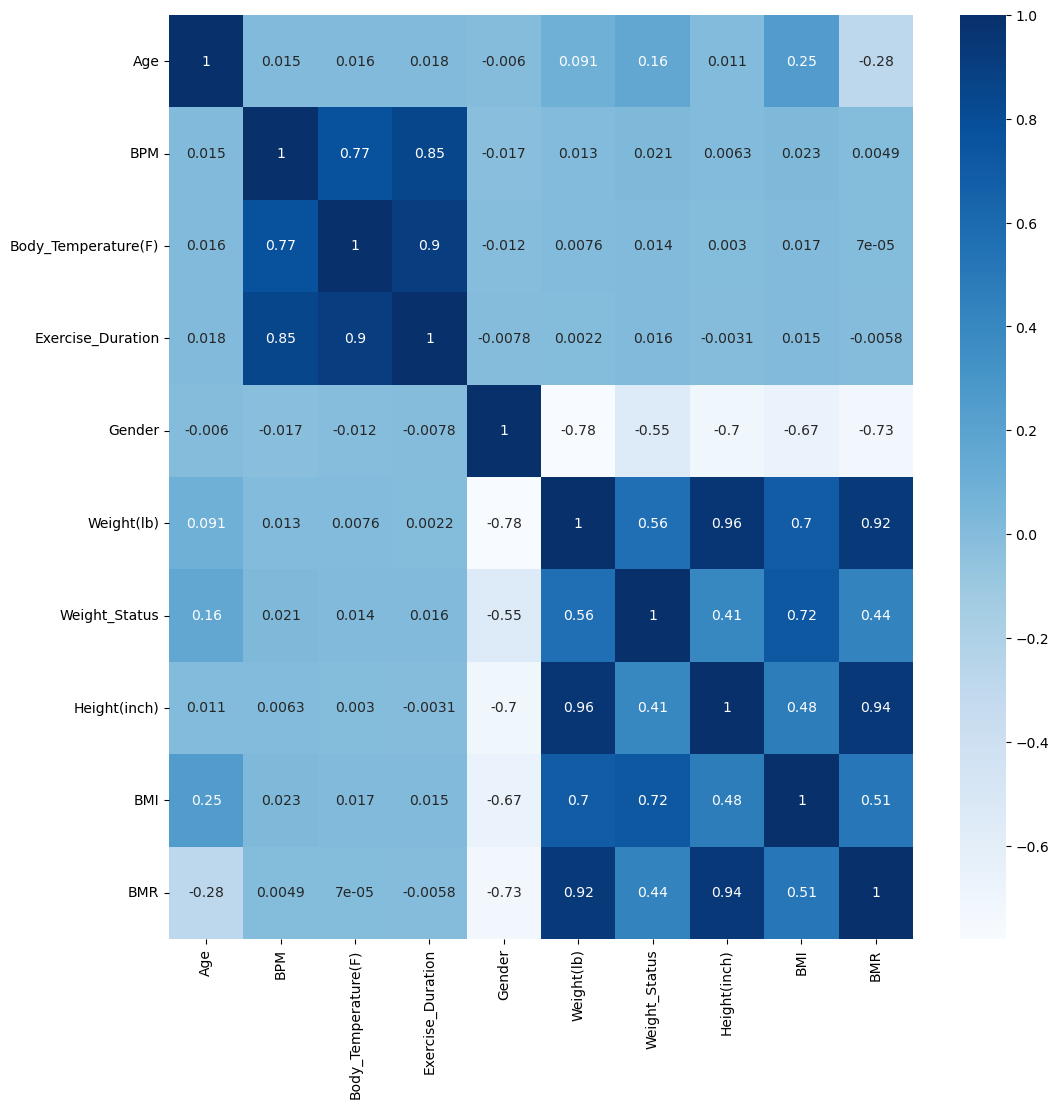

In [24]:
plt.figure(figsize = (12,12))
sns.heatmap(x.corr(), annot = True, cmap = 'Blues')
plt.show()

In [25]:
y

0       166.0
1        33.0
2        23.0
3        91.0
4        32.0
        ...  
7495    151.0
7496    114.0
7497     41.0
7498     57.0
7499     59.0
Name: Calories_Burned, Length: 7500, dtype: float64

### train - test로 데이터 셋 분할

In [26]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, random_state=0)
# x = train_x / y = train_y

## 요인분석 시작

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 1856 to 2732
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5625 non-null   int64  
 1   BPM                  5625 non-null   float64
 2   Body_Temperature(F)  5625 non-null   float64
 3   Exercise_Duration    5625 non-null   float64
 4   Gender               5625 non-null   int64  
 5   Weight(lb)           5625 non-null   float64
 6   Weight_Status        5625 non-null   int64  
 7   Height(inch)         5625 non-null   float64
 8   BMI                  5625 non-null   float64
 9   BMR                  5625 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 483.4 KB


In [28]:
# const와 BMI를 삭제한 이유 : 요인분석을 하는데 있어서 바틀렛 테스트와 KMO테스트에 부적합하다
x_tmp = x.drop(['BMR','BMI'],axis=1)
x_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 1856 to 2732
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5625 non-null   int64  
 1   BPM                  5625 non-null   float64
 2   Body_Temperature(F)  5625 non-null   float64
 3   Exercise_Duration    5625 non-null   float64
 4   Gender               5625 non-null   int64  
 5   Weight(lb)           5625 non-null   float64
 6   Weight_Status        5625 non-null   int64  
 7   Height(inch)         5625 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 395.5 KB


### 적합성 검정 -> 바틀렛 테스트, KMO(Kaiser-Meyer-Olkin) 테스트

In [29]:
#!pip install factor_analyzer

In [30]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# 바틀렛 테스트 : 관측된 상관 행렬을 사용하여 관측된 변수가 단위 행렬과 상호 관련되는지 여부
#바틀렛의 구면성 검정에서는 관측된 상관 행렬을 사용하여 관측된 변수가 단위 행렬과 상호 관련되는지 여부를 확인한다. 
#검정에서 통계적으로 유의하지 않은 것으로 판명되면 요인 분석을 사용하지 말아야 한다.
chi_square_value,p_value=calculate_bartlett_sphericity(x_tmp)

chi_square_value, p_value

(41411.59981839262, 0.0)

In [31]:
# KMO 검정: 변수들 간의 상관관계가 다른 변수들에 의해 잘 설명되는지 여부
# 요인 분석에 대한 데이터의 적합성을 측정한다. 각 관측 변수와 전체 모형에 대한 적합성을 결정한다. 
# KMO는 모든 관측 변수 간의 분산 비율을 추정한다. 
# KMO 값의 범위는 0에서 1 사이이다. 
# 0.6미만의 값은 부적절하다
kmo_all,kmo_model=calculate_kmo(x_tmp)

kmo_model

0.6470604561837573

### 요인 수 선택

In [32]:
fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(x_tmp)
ev,v= fa.get_eigenvalues()
ev,v

(array([3.03050103, 2.67562643, 1.04210735, 0.61952441, 0.2936992 ,
        0.23763834, 0.07905074, 0.0218525 ]),
 array([ 2.90942170e+00,  2.54810074e+00,  4.41077228e-01,  2.00202256e-01,
         3.45364157e-02,  1.09526626e-02,  3.21128130e-03, -7.93489828e-06]))

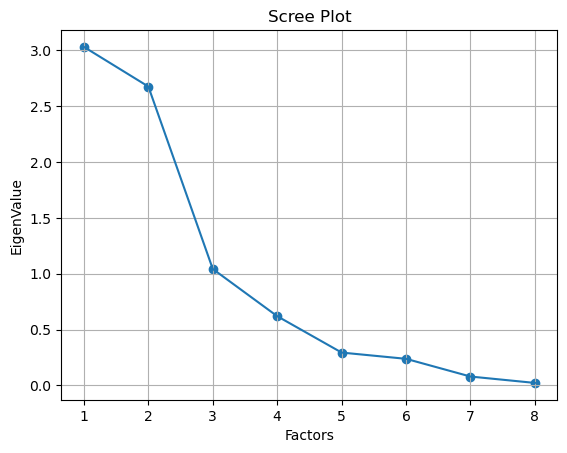

In [33]:
plt.scatter(range(1,x_tmp.shape[1]+1),ev)
plt.plot(range(1,x_tmp.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('EigenValue')
plt.grid()
plt.show()
#eigenvalue값이 1이상일때까지 혹은 그래프 기울기가 완만해지기 전까지 나누어야 데이터 결함을 최소화할 수 있다
#아래와 같은 경우는 3개로 나누어주는 것이 적절하다고 판단된다
#스크리 도표라고 불림

### 탐색적 요인분석 실시

In [34]:
# 요인 3개가 적합하다고 생각하여서 가장 흔하게 쓰이는 varimax방법을 이용하여 분석을 실시
# method = 최대우도방법()
fa = FactorAnalyzer(n_factors=3,method ='ml', rotation="varimax")
fa.fit(x_tmp)
fa_result = pd.DataFrame(fa.loadings_,index=x_tmp.columns)
fa_result

,0,1,2
Age,0.024059,0.008003,0.292753
BPM,0.012576,0.853446,0.013554
Body_Temperature(F),0.005033,0.905695,0.009536
Exercise_Duration,0.004432,0.997375,0.015063
Gender,-0.723981,-0.015658,-0.340272
Weight(lb),0.968706,0.002784,0.237922
Weight_Status,0.424419,0.000564,0.627896
Height(inch),0.996942,0.001342,-0.033316


<Axes: >

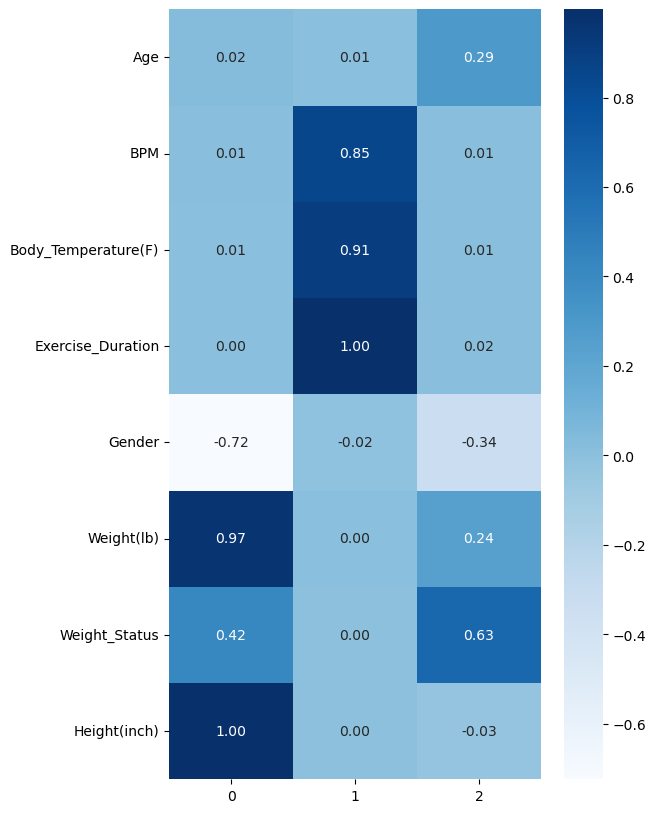

In [35]:
plt.figure(figsize=(6,10))
sns.heatmap(fa_result,cmap="Blues",annot=True,fmt='.2f')

In [36]:
#전체분산에서 각 요인들이 얼만큼 설명할 수 있는지를 나타내줌
var = fa.get_factor_variance()
df1 = pd.DataFrame(var)

df1.index = ['SS Loadings','Proportion Var','Cumulitive Var']
df1

,0,1,2
SS Loadings,2.637348,2.543729,0.653961
Proportion Var,0.329668,0.317966,0.081745
Cumulitive Var,0.329668,0.647635,0.729380


In [37]:
#4개의 요인과 독립변수들과의 계수
loadings = pd.DataFrame(fa.loadings_,index=x_tmp.columns)
loadings

,0,1,2
Age,0.024059,0.008003,0.292753
BPM,0.012576,0.853446,0.013554
Body_Temperature(F),0.005033,0.905695,0.009536
Exercise_Duration,0.004432,0.997375,0.015063
Gender,-0.723981,-0.015658,-0.340272
Weight(lb),0.968706,0.002784,0.237922
Weight_Status,0.424419,0.000564,0.627896
Height(inch),0.996942,0.001342,-0.033316


In [38]:
#회귀분석에 쓰일 요인점수
fa_score = fa.transform(x_tmp)
print(pd.DataFrame(fa_score))

             0         1         2
0     0.038833  1.603250  0.703382
1     0.228386 -1.772289  0.096699
2    -0.359249  0.307611 -0.808033
3    -0.567212 -0.506584 -1.238847
4    -0.002662 -0.521713 -0.896186
...        ...       ...       ...
5620  1.111182  0.528126  0.383203
5621  1.636530  0.073138  0.184357
5622  0.288521 -0.312450  1.416491
5623  0.839863 -1.025696  1.586570
5624 -0.826934 -0.891123  0.142066

[5625 rows x 3 columns]


In [39]:
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(fa_score,y)
y_pred = LR.predict(fa_score)
mean_squared_error(y_pred,y) # 출력되는 값이 작을수록 모델분석을 잘했다는 뜻이다

333.19969588429274

In [40]:
print(y.shape)
print(x.shape)

(5625,)
(5625, 10)


In [41]:
fa_score = sm.add_constant(fa_score)
fullModel = sm.OLS(y,fa_score)
fittedFullModel = fullModel.fit()
fittedFullModel.summary()
# 결과를 확인해보면 r^2 값이 매우 작기에 설명력이 부족하다는 뜻이다
# 그리고 첫번째와 세번째 요인의 p-value가 0.05보다 높기 때문에 유의미하지 않다는 뜻이다
#따라서 다른 분석방법을 생각해봐야 할 것 같다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories_Burned   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.013e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:02:48   Log-Likelihood:                -24319.
No. Observations:                5625   AIC:                         4.865e+04
Df Residuals:                    5621   BIC:                         4.867e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.2633      0.243    366.629      0.000      88.786      89.741
x1             2.0967      0.244      8.595      0.000       1.618       2.575
x2            59.7579      0.244    244.846      0.000      59.279      60.236
x3             4.8873      0.257     19.000      0.000       4.383       5.392
==============================================================================
Omnibus:                      527.578   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1511.466
Skew:                           0.509   Prob(JB):                         0.00
Kurtosis:                       5.327   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## T-SNE

In [42]:
# 크게 의미가 있지는 않을 것 같지만 고차원의 데이터셋을 시각화해준다고 수업시간에 배워서 사용해보면 좋을 것 같아서 사용해봤다.
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
 
scaled_x = StandardScaler().fit_transform(x)
scaled_x


array([[ 2.03077235,  1.72718501,  0.9731008 , ...,  0.03525164,
         0.65816645, -0.56984994],
       [ 0.78873306, -0.88398048, -3.22135367, ...,  0.21245493,
         0.40026498, -0.04177672],
       [ 0.55215415,  0.05603909,  0.11999141, ..., -0.31915493,
        -0.78585265, -0.63834543],
       ...,
       [-0.86731932, -0.04840753, -0.02219348, ...,  0.21245493,
         1.60676418,  0.76483343],
       [-0.68988514, -0.36174739, -0.37765573, ...,  0.74406479,
         1.8919182 ,  1.25893583],
       [ 0.13814106, -1.61510682, -0.02219348, ..., -0.8507648 ,
        -0.09363313, -0.81010852]])

In [43]:
tsne_2d = TSNE(n_components = 2,random_state=3).fit_transform(scaled_x)
tsne_3d = TSNE(n_components = 3,random_state=3).fit_transform(scaled_x)

In [109]:
perplex = [5,30,50,100]
res = []
for per in perplex:
    tmp = TSNE(n_components = 2,random_state=3,perplexity = per).fit_transform(scaled_x)
    res.append(tmp)

In [110]:
per5 = res[0]
per30 = res[1]
per50 = res[2]
per100 = res[3]

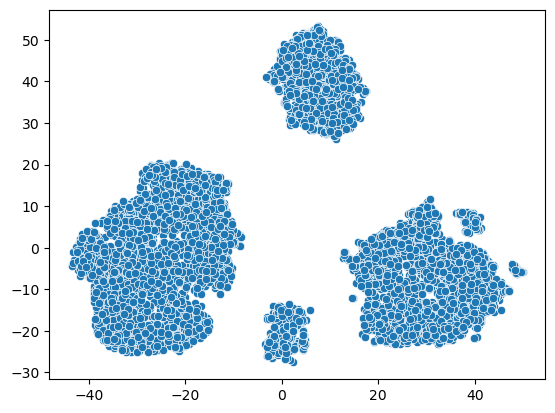

In [114]:
palette = sns.color_palette("bright", 10)
sns.scatterplot(x=per100[:,0],y= per100[:,1])
plt.show()

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


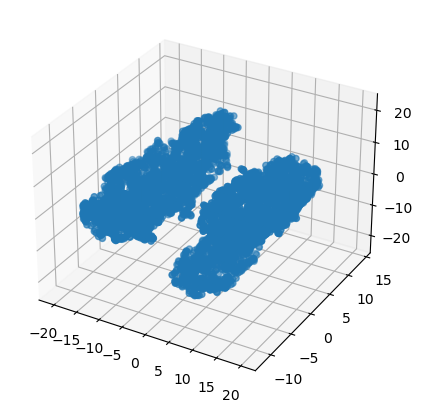

In [103]:
#3차원그래프도 이렇게 나오네ㅎㅎ
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(tsne_3d[:,0], tsne_3d[:,1], tsne_3d[:,2])

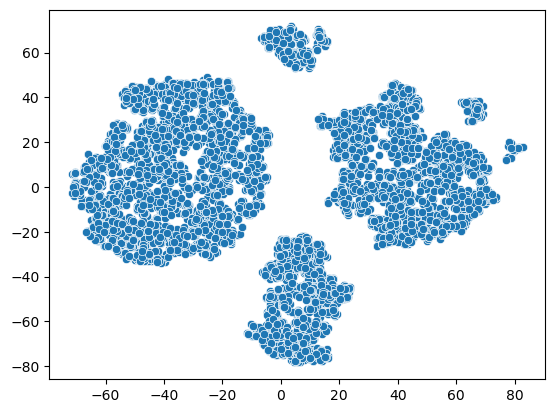

In [104]:
#2차원 그래프로 해봤는데 의미 없는듯...
palette = sns.color_palette("bright", 10)
sns.scatterplot(x=tsne_2d[:,0],y= tsne_2d[:,1])
plt.show()

# 다중공선성 체크

In [46]:
# Train the MLR / 회귀모델적합
origin_x = sm.add_constant(x)
fullModel = sm.OLS(y,origin_x)
fittedFullModel = fullModel.fit()

In [47]:
fittedFullModel.summary()
#r^2은 높게 나왔지만 다중공선성이 매~우 높게 나와서 변수선택을 실시해야 할 듯하다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories_Burned   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.930e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:04:24   Log-Likelihood:                -21505.
No. Observations:                5625   AIC:                         4.303e+04
Df Residuals:                    5615   BIC:                         4.310e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0047      0.348     34.471      0.000      11.322      12.687
Age                   -33.1947      0.982    -33.815      0.000     -35.119     -31.270
BPM                     2.0377      0.029     69.204      0.000       1.980       2.095
Body_Temperature(F)    -9.3703      0.245    -38.215      0.000      -9.851      -8.890
Exercise_Duration       6.5981      0.051    130.138      0.000       6.499       6.697
Gender                  0.6161      0.502      1.226      0.220      -0.369       1.601
Weight(lb)             31.7297      0.928     34.181      0.000      29.910      33.550
Weight_Status           1.0742      0.400      2.685      0.007       0.290       1.859
Height(inch)          101.8030      2.948     34.534      0.000      96.024     107.582
BMI                    -7.5845      0.425    -17.850      0.000      -8.417      -6.751
BMR                    -6.7426      0.196    -34.344      0.000      -7.127      -6.358
==============================================================================
Omnibus:                     1199.525   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3291.479
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       5.988   Cond. No.                     1.30e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.55e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [49]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(origin_x.values, i)} 
             for i, column in enumerate(x.columns)
             if column != 'Intercept') 

C:\Users\user\anaconda3\envs\datamining\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\user\anaconda3\envs\datamining\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,Age,0.000000
1,BPM,inf
2,Body_Temperature(F),3.642111
3,Exercise_Duration,5.451145
4,Gender,8.143043
5,Weight(lb),2.891385
6,Weight_Status,inf
7,Height(inch),2.175640
8,BMI,inf
9,BMR,20.383664


## PCA를 통해 다중공선성 해결

In [50]:
pca_x = x.copy()
pca_x

,Age,BPM,Body_Temperature(F),Exercise_Duration,Gender,Weight(lb),Weight_Status,Height(inch),BMI,BMR
1856,77,112.0,105.4,29.0,1,172.0,2,69.0,25.397185,1329.553240
6861,56,87.0,99.5,1.0,1,174.2,1,70.0,24.992367,1460.407264
4772,52,96.0,104.2,18.0,2,147.7,1,67.0,23.130564,1312.580384
415,50,89.0,104.2,11.0,2,136.7,1,66.0,22.061547,1256.810264
7472,46,92.0,103.5,11.0,2,158.7,1,69.0,23.433333,1424.225504
...,...,...,...,...,...,...,...,...,...,...
4931,33,99.0,104.7,20.0,1,205.0,2,75.0,25.620444,1794.488600
3264,35,106.0,104.5,16.0,1,220.5,2,78.0,25.478550,1902.420360
1653,28,95.0,104.0,13.0,1,187.4,2,70.0,26.886163,1660.281408
2607,31,92.0,103.5,7.0,1,207.2,2,73.0,27.333759,1782.717624


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#PCA에 사용할 dataset scaling 실시
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_x)

In [52]:
pca_3 = PCA(n_components=3,random_state=3)
pca_4 = PCA(n_components=4,random_state=3)

pca_res3 = pca_3.fit_transform(data_scaled)
pca_res4 = pca_4.fit_transform(data_scaled)
print(sum(pca_3.explained_variance_ratio_))
print(sum(pca_4.explained_variance_ratio_))
# 4개의 principal component의 설명력이 0.91정도이므로 괜찮다고 판단이 든다

0.8417070951600829
0.9119495241254949


In [53]:
# 앞선 요인분석과 동일하게 r^2값이 0.91정도로 비슷하게 나왔다
# 요인분석과 pca는 비슷한 측면이 많아서 그런 것 같다
# p-value 측면에서 보면 4개의 principal component의 p-value가 0.05보다 낮게 나왔으므로 유의미하다고 볼 수 있다.
# 선형회귀모델이 데이터에 대하여 낮은 연관성을 가지고 있음을 확인하였다.
# 그렇지만 각 회귀계수들이 비선형성을 가질 가능성을 염두해두고 이후 polynomial feature를 사용해볼 것이다. 
pca_res3_one = sm.add_constant(pca_res3)
pca_res4_one = sm.add_constant(pca_res4)

fullModel2 = sm.OLS(y,pca_res3_one)
fittedFullModel2 = fullModel2.fit()
print(fittedFullModel2.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 1.799e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:04:24   Log-Likelihood:                -24608.
No. Observations:                5625   AIC:                         4.922e+04
Df Residuals:                    5621   BIC:                         4.925e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.2633      0.256    348.275      0.0

In [54]:
fullModel3 = sm.OLS(y,pca_res4_one)
fittedFullModel3 = fullModel3.fit()
print(fittedFullModel3.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.434e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:04:24   Log-Likelihood:                -24451.
No. Observations:                5625   AIC:                         4.891e+04
Df Residuals:                    5620   BIC:                         4.895e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.2633      0.249    358.060      0.0

## PCA에 대한 생각
pca는 설명 변수의 개수를 줄이는 방법론이기 때문에, 다중공선성을 낮추는 데에는 효과적이지만, 다중회귀에서는 충분한 설명 변수의 개수가 필수적이므로  성능을 낮추는 결과를 야기할 수 있다. 그러므로 변수의 개수를 늘리는 polynomial 적용 

## Polynomials 결합

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
# 지금부터는 단항 feature를 다항 feature로 변환하는 다항회귀를 실시해볼 것이다.
# 차수가 높을수록 feature의 설명력을 높여줄 수 있다고 생각했다.
# 따라서 degree = 3으로 설정해두었다.
poly3 = PolynomialFeatures(degree = 3)
train_pca3_poly3 = poly3.fit_transform(pca_res3)
train_pca4_poly3 = poly3.fit_transform(pca_res4)

#### pca(n=3) + polynomial(degree=3)

In [57]:
fullModel = sm.OLS(y,train_pca3_poly3)
fittedFullModel = fullModel.fit()
fittedFullModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories_Burned   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:04:24   Log-Likelihood:                -20356.
No. Observations:                5625   AIC:                         4.075e+04
Df Residuals:                    5605   BIC:                         4.088e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.2541      0.254    276.792      0.000      69.757      70.752
x1            -0.1303      0.141     -0.927      0.354      -0.406       0.145
x2           -37.3189      0.187   -199.759      0.000     -37.685     -36.953
x3             5.5739      0.267     20.842      0.000       5.050       6.098
x4             0.7452      0.032     23.473      0.000       0.683       0.807
x5            -1.1788      0.037    -32.178      0.000      -1.251      -1.107
x6             1.2500      0.060     20.881      0.000       1.133       1.367
x7             5.3818      0.050    106.986      0.000       5.283       5.480
x8            -1.7096      0.070    -24.549      0.000      -1.846      -1.573
x9             0.9139      0.093      9.782      0.000       0.731       1.097
x10            0.1296      0.013     10.287      0.000       0.105       0.154
x11           -0.2721      0.018    -14.860      0.000      -0.308      -0.236
x12            0.2234      0.030      7.350      0.000       0.164       0.283
x13            0.2595      0.021     12.648      0.000       0.219       0.300
x14           -0.3685      0.033    -11.182      0.000      -0.433      -0.304
x15            0.3311      0.048      6.875      0.000       0.237       0.426
x16            0.0264      0.024      1.095      0.274      -0.021       0.074
x17            0.0793      0.038      2.113      0.035       0.006       0.153
x18           -0.2391      0.049     -4.907      0.000      -0.335      -0.144
x19           -0.3474      0.057     -6.047      0.000      -0.460      -0.235
==============================================================================
Omnibus:                      494.328   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1847.904
Skew:                           0.389   Prob(JB):                         0.00
Kurtosis:                       5.698   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### pca(n=4) + polynomial(degree=3)

In [58]:
fullModel = sm.OLS(y,train_pca4_poly3)
fittedFullModel = fullModel.fit()
fittedFullModel.summary()
# 결과를 보면 pca만 사용했을 때보다 r^2의 값이 0.91->0.98 정도로 비약적으로 상승했음을 알 수 있다.
# 하지만 너무 많은 feature가 생겼으며, p-value가 0.05보다 높은 feature가 너무 많이 보이기에 차수를 낮추기로 결정하였다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories_Burned   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:04:25   Log-Likelihood:                -19231.
No. Observations:                5625   AIC:                         3.853e+04
Df Residuals:                    5590   BIC:                         3.876e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4340      0.256    279.079      0.000      70.932      71.936
x1             1.2958      0.137      9.432      0.000       1.026       1.565
x2           -37.7906      0.176   -215.303      0.000     -38.135     -37.446
x3             5.9763      0.257     23.228      0.000       5.472       6.481
x4            -6.0297      0.319    -18.875      0.000      -6.656      -5.403
x5             0.7564      0.030     25.019      0.000       0.697       0.816
x6            -1.2363      0.031    -39.808      0.000      -1.297      -1.175
x7             1.3608      0.055     24.578      0.000       1.252       1.469
x8            -1.1177      0.083    -13.477      0.000      -1.280      -0.955
x9             5.4283      0.041    131.414      0.000       5.347       5.509
x10           -1.8500      0.061    -30.429      0.000      -1.969      -1.731
x11            1.3914      0.084     16.652      0.000       1.228       1.555
x12            0.1019      0.095      1.078      0.281      -0.083       0.287
x13            0.4921      0.183      2.693      0.007       0.134       0.850
x14           -0.3305      0.141     -2.341      0.019      -0.607      -0.054
x15            0.0072      0.013      0.559      0.576      -0.018       0.033
x16           -0.2282      0.017    -13.234      0.000      -0.262      -0.194
x17           -0.0961      0.030     -3.191      0.001      -0.155      -0.037
x18            0.0697      0.043      1.629      0.103      -0.014       0.154
x19            0.2749      0.017     16.308      0.000       0.242       0.308
x20           -0.3284      0.031    -10.747      0.000      -0.388      -0.268
x21            0.3892      0.046      8.492      0.000       0.299       0.479
x22           -0.1005      0.043     -2.322      0.020      -0.185      -0.016
x23           -0.0614      0.085     -0.718      0.473      -0.229       0.106
x24            0.1515      0.077      1.969      0.049       0.001       0.302
x25            0.0076      0.020      0.383      0.702      -0.031       0.046
x26            0.0975      0.031      3.167      0.002       0.037       0.158
x27            0.0733      0.042      1.726      0.084      -0.010       0.157
x28           -0.0407      0.044     -0.934      0.350      -0.126       0.045
x29           -0.0282      0.085     -0.329      0.742      -0.196       0.139
x30            0.1467      0.065      2.246      0.025       0.019       0.275
x31           -0.0245      0.059     -0.414      0.679      -0.140       0.091
x32           -0.2678      0.139     -1.929      0.054      -0.540       0.004
x33            0.1742      0.155      1.126      0.260      -0.129       0.478
x34            0.1569      0.080      1.962      0.050       0.000       0.314
==============================================================================
Om

In [59]:
poly2 = PolynomialFeatures(degree = 2)
train_pca3_poly2 = poly2.fit_transform(pca_res3)
train_pca4_poly2 = poly2.fit_transform(pca_res4)

### best: polynomial(degree=2) + pca(n=3)

In [60]:
fullModel = sm.OLS(y,train_pca3_poly2)
fittedFullModel = fullModel.fit()
fittedFullModel.summary()
# r^2도 0.98정도로 높게 유지하면서, p-value가 0.05보다 높게 나온 feature의 갯수도 적어졌다
# degree2와 pca의 조합이 여태까진 가장 좋은 조합인 것으로 보인다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories_Burned   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.599e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:04:25   Log-Likelihood:                -20691.
No. Observations:                5625   AIC:                         4.140e+04
Df Residuals:                    5615   BIC:                         4.147e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.1351      0.264    265.624      0.000      69.618      70.653
x1             1.9887      0.062     32.260      0.000       1.868       2.110
x2           -38.6828      0.081   -475.842      0.000     -38.842     -38.523
x3             5.3219      0.116     45.774      0.000       5.094       5.550
x4             0.8234      0.033     25.102      0.000       0.759       0.888
x5            -1.1363      0.037    -30.844      0.000      -1.209      -1.064
x6             1.3786      0.058     23.870      0.000       1.265       1.492
x7             5.4203      0.046    118.679      0.000       5.331       5.510
x8            -1.8672      0.068    -27.623      0.000      -2.000      -1.735
x9             0.7261      0.085      8.575      0.000       0.560       0.892
==============================================================================
Omnibus:                      325.692   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.338
Skew:                           0.227   Prob(JB):                    2.10e-236
Kurtosis:                       5.104   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### polynomial(degree=2) + pca(n=4)

In [61]:
fullModel = sm.OLS(y,train_pca4_poly2)
fittedFullModel = fullModel.fit()
fittedFullModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories_Burned   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.443e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:04:25   Log-Likelihood:                -19641.
No. Observations:                5625   AIC:                         3.931e+04
Df Residuals:                    5610   BIC:                         3.941e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.2799      0.265    269.420      0.000      70.761      71.799
x1             2.0809      0.053     39.248      0.000       1.977       2.185
x2           -38.6952      0.067   -573.263      0.000     -38.828     -38.563
x3             5.7311      0.103     55.464      0.000       5.528       5.934
x4            -5.3587      0.142    -37.865      0.000      -5.636      -5.081
x5             0.7673      0.031     24.748      0.000       0.707       0.828
x6            -1.1574      0.031    -37.834      0.000      -1.217      -1.097
x7             1.3180      0.054     24.251      0.000       1.211       1.425
x8            -1.0853      0.080    -13.558      0.000      -1.242      -0.928
x9             5.4306      0.038    143.136      0.000       5.356       5.505
x10           -1.8501      0.056    -32.959      0.000      -1.960      -1.740
x11            1.4014      0.078     18.050      0.000       1.249       1.554
x12            0.0985      0.077      1.282      0.200      -0.052       0.249
x13            0.4119      0.148      2.788      0.005       0.122       0.701
x14           -0.1220      0.112     -1.090      0.276      -0.342       0.098
==============================================================================
Omnibus:                      147.349   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.739
Skew:                           0.036   Prob(JB):                     3.43e-78
Kurtosis:                       4.232   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## PCA - Polynomials
머리 속으로 PCA를 통해서 다중공선성을 낮추고, 대신 줄어든 설명 변수의 개수로 인해 설명변수의 빈약함을 Polynomial로 충족시켜주지 않을까라고 가정, 결과를 보니 예상과 어느 정도 일치, F-statistic(수치만으로는 유의미함)이 비교적 조금 낮은 거 말고는 다중공선성도 전보다 더 낮고 R-squared도 나쁘지 않음 

## filter method : feature간 상관성 기반으로 feature selection 실시
- 상관관계가 높은 변수 

- 상관관계는 -1~1사이의 수이며

- 0.3~0.7 :뚜렷한 양적 선형관계, 0.7이상이면 강한 양적 상관관계라고 일컫는다

- 상호간에 상관관계가 높은 조합

1. bpm,body_temperature,exercise_duration
2. weight(lb),weight_status, height, bmr,bmi

- vif가 10보다 높은면 통상적으로 크다고 판단

In [62]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(x.values, i)} 
             for i, column in enumerate(x.columns)
             if column != 'Intercept') 
#하지만, 무조건 10을 초과한다해서 한꺼번에 feature를 drop하는 법보다는 VIF가 가장 높은 상위 몇 개의 Feature를 제거하면서 확인하는 것이 더 바람직하다. 
# 한번에 drop하면 정보손실이 너무 크게 발생할 수 있기 때문이다

,컬럼,VIF
0,Age,9.505778e+04
1,BPM,3.642111e+00
2,Body_Temperature(F),5.451145e+00
3,Exercise_Duration,8.143043e+00
4,Gender,2.891385e+00
5,Weight(lb),1.155678e+06
6,Weight_Status,2.175640e+00
7,Height(inch),1.942139e+06
8,BMI,2.038366e+01
9,BMR,4.015892e+06


In [63]:
def vif(x):
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = 10
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a]}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [64]:
vif(x)

1번째 VIF 측정
Max VIF feature & value : BMR, 4015891.9971667505
2번째 VIF 측정
Max VIF feature & value : Body_Temperature(F), 12089.836089534592
3번째 VIF 측정
Max VIF feature & value : Weight_Status, 959.8108350380234
4번째 VIF 측정
Max VIF feature & value : Weight_Status, 324.28407125332956
5번째 VIF 측정
Max VIF feature & value : BPM, 138.26497227573296
6번째 VIF 측정
Max VIF feature & value : Exercise_Duration, 18.89230596188942
7번째 VIF 측정
Max VIF feature & value : Age, 7.260281236519285


Age의 vif는 7.26입니다.
Exercise_Duration의 vif는 4.08입니다.
Gender의 vif는 5.32입니다.
Weight_Status의 vif는 5.55입니다.


,Age,Exercise_Duration,Gender,Weight_Status
1856,77,29.0,1,2
6861,56,1.0,1,1
4772,52,18.0,2,1
415,50,11.0,2,1
7472,46,11.0,2,1
...,...,...,...,...
4931,33,20.0,1,2
3264,35,16.0,1,2
1653,28,13.0,1,2
2607,31,7.0,1,2


In [65]:
filter_x = x[['Age','Exercise_Duration','Gender','Weight_Status']]
filter_x

,Age,Exercise_Duration,Gender,Weight_Status
1856,77,29.0,1,2
6861,56,1.0,1,1
4772,52,18.0,2,1
415,50,11.0,2,1
7472,46,11.0,2,1
...,...,...,...,...
4931,33,20.0,1,2
3264,35,16.0,1,2
1653,28,13.0,1,2
2607,31,7.0,1,2


In [66]:
scaler = StandardScaler()
filter_x = scaler.fit_transform(filter_x)

LR = LinearRegression()
LR.fit(filter_x, y)

ridge = Ridge()
ridge.fit(filter_x, y)

Ridge()

In [67]:
from sklearn.metrics import r2_score

y_pred1 = LR.predict(filter_x)
y_pred2 = ridge.predict(filter_x)

print(mean_squared_error(y,y_pred1))
print(mean_squared_error(y,y_pred2))

print("#####r2 score#####")
print(r2_score(y,y_pred1))
print(r2_score(y,y_pred2))

269.57849644151446
269.57861049222083
#####r2 score#####
0.9311202522058335
0.9311202230648449


In [68]:
filter_x_one = sm.add_constant(filter_x)
fullModel = sm.OLS(y,filter_x_one)
fittedFullModel = fullModel.fit()
print(fittedFullModel.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 1.899e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:04:25   Log-Likelihood:                -23723.
No. Observations:                5625   AIC:                         4.746e+04
Df Residuals:                    5620   BIC:                         4.749e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.2633      0.219    407.566      0.0

#### 가장 성능이 높게 나온 데이터 : poly(deg = 2)+pca(n=3) data 
#### stacking 적용, 

stacking? 앙상블 기법 중 하나로 여러 개의 모델의 예측값이 하나의 설명변수가 되어서 input data 구성, 메타모델에 해당 input data로 새로운 예측값을 도출하는 방식

# stacking
- 가장 성능이 좋은 poly(deg = 2)+pca(n=3) data를 이용
- LinearRegression과 Ridge를 이용해서 각각의 예측 값 도출
- 위에서 도출한 두 가지 예측 값을 concat을 통해 합친 new_train 생성
- 메타 모델로 automl사용 : 자동으로 여러 개의 모델을 앙상블 한 후 가장 성능이 높은 모델 두 개의 짝을 찾아서 결과를 도출해주는 함수
- new_train을 input으로 새로운 output도출 


In [69]:
LR = LinearRegression()
LR.fit(train_pca3_poly2, y)

ridge = Ridge()
ridge.fit(train_pca3_poly2, y)

y_pred1 = LR.predict(train_pca3_poly2)
y_pred2 = ridge.predict(train_pca3_poly2)

print("#####MSE#####")
print("Linear Regression : ",mean_squared_error(y,y_pred1))
print("Ridge Regression : ",mean_squared_error(y,y_pred2))

print("#####r2 score#####")
print("Linear Regression : ",r2_score(y,y_pred1))
print("Ridge Regression : ",r2_score(y,y_pred2))

pred_train_LR = pd.DataFrame(LR.predict(train_pca3_poly2)).rename({0:'LR'}, axis=1)
pred_train_ridge = pd.DataFrame(ridge.predict(train_pca3_poly2)).rename({0:'Ridge'}, axis=1)

#####MSE#####
Linear Regression :  91.73597903956878
Ridge Regression :  91.73599981780164
#####r2 score#####
Linear Regression :  0.9765606263730041
Ridge Regression :  0.9765606210639773


In [70]:
new_train = pd.concat([pred_train_LR, pred_train_ridge], axis=1)
train_y = pd.DataFrame(y).reset_index(drop=True)
new_train['Calories_Burned']=train_y
new_train = np.round(new_train)
new_train.isnull().any()

LR                 False
Ridge              False
Calories_Burned    False
dtype: bool

In [71]:
new_train

,LR,Ridge,Calories_Burned
0,237.0,237.0,264.0
1,1.0,1.0,4.0
2,83.0,83.0,97.0
3,51.0,51.0,51.0
4,44.0,44.0,53.0
...,...,...,...
5620,108.0,108.0,107.0
5621,110.0,110.0,107.0
5622,66.0,66.0,56.0
5623,41.0,41.0,30.0


In [72]:
!pip install autogluon

In [73]:
from autogluon.tabular import TabularPredictor, TabularDataset

In [74]:
stacking = TabularPredictor(label='Calories_Burned', eval_metric='rmse', problem_type='regression').fit(new_train, presets=['best_quality'], num_stack_levels=0)


No path specified. Models will be saved in: "AutogluonModels\ag-20230520_120433\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230520_120433\"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    5625
Train Data Columns: 2
Label Column: Calories_Burned
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3087.98 MB
	Train Data (Original)  Memory Usage: 0.09 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatu

In [75]:
ld = stacking.leaderboard(silent=True)
LD = ld[['model', 'score_val']].rename({'score_val':'RMSE'},axis=1)
LD['RMSE'] = -LD['RMSE']
LD.head()

,model,RMSE
0,WeightedEnsemble_L2,9.538938
1,NeuralNetFastAI_BAG_L1,9.574651
2,CatBoost_BAG_L1,9.589782
3,NeuralNetTorch_BAG_L1,9.605000
4,LightGBMXT_BAG_L1,9.628756


In [76]:
train_pca3_poly2.shape

(5625, 10)

# voting

In [79]:
test3 = poly2.fit_transform(pca_res3)

Pred1 = pd.DataFrame(LR.predict(test3)).rename({0:'LR'}, axis=1)
Pred2 = pd.DataFrame(ridge.predict(test3)).rename({0:'Ridge'},axis=1)

Pred1 = np.round(Pred1)
Pred2 = np.round(Pred2)

In [80]:
pred = 0.5*Pred1['LR'] + 0.5*Pred2['Ridge']
pred

0       237.0
1         1.0
2        83.0
3        51.0
4        44.0
        ...  
5620    108.0
5621    110.0
5622     66.0
5623     41.0
5624     29.0
Length: 5625, dtype: float64

## pipeline 시작!

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=3,random_state=3)),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())])

In [82]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [83]:
def custom_scoring_function(estimator, X, y):
    y_pred = estimator.predict(X)
    return -mean_squared_error(y, np.rint(y_pred))

In [84]:
# 교차 검증 수행
scores = np.sqrt(-cross_val_score(pipeline, scaled_x,y, cv=5, scoring=custom_scoring_function))
scores

array([9.36594303, 9.59082895, 9.66220587, 9.61831586, 9.81889335])

In [85]:
# 교차 검증 평균 점수 출력
print('Cross-validation RMSE:', scores.mean())

Cross-validation RMSE: 9.61123741317941


In [86]:
pipeline.fit(scaled_x, y)
test_y_pred = pipeline.predict(scaled_x)
test_y_pred =np.rint(test_y_pred )
test_y_pred 

array([237.,   1.,  83., ...,  66.,  41.,  29.])

## test set으로 실험시작!

In [87]:
scaler = StandardScaler()
scaler.fit(x)
f_scaled_x = scaler.transform(x_test)
pca_x_test= pca_3.transform(f_scaled_x)
test3 = poly2.transform(pca_x_test)

y_pred1 = LR.predict(test3)
y_pred2 = ridge.predict(test3)

print("#####MSE#####")
print("Linear Regression : ",mean_squared_error(y_test,y_pred1))
print("Ridge Regression : ",mean_squared_error(y_test,y_pred2))

print("#####r2 score#####")
print("Linear Regression : ",r2_score(y_test,y_pred1))
print("Ridge Regression : ",r2_score(y_test,y_pred2))

#####MSE#####
Linear Regression :  96.3303721767325
Ridge Regression :  96.32759450354294
#####r2 score#####
Linear Regression :  0.976158374959456
Ridge Regression :  0.9761590624294737


In [88]:
scores = np.sqrt(-cross_val_score(pipeline, x_test,y_test, cv=5, scoring=custom_scoring_function))
scores

array([10.02357222, 10.06816766,  9.89855208,  9.83463268,  9.47051565])

In [89]:
Pred1 = pd.DataFrame(LR.predict(test3)).rename({0:'LR'}, axis=1)
Pred2 = pd.DataFrame(ridge.predict(test3)).rename({0:'Ridge'},axis=1)

Pred1 = np.round(Pred1)
Pred2 = np.round(Pred2)

In [90]:
#voting method
pred = 0.6*Pred1['LR'] + 0.4*Pred2['Ridge']
sample_submission1 = pd.DataFrame()
sample_submission1['Calories_Burned'] = np.array(pred)
sample_submission1.to_csv('PolynomialFeatures_Voting.csv', index = True)
sample_submission1

,Calories_Burned
0,136.0
1,15.0
2,89.0
3,51.0
4,8.0
...,...
1870,123.0
1871,9.0
1872,47.0
1873,172.0


In [91]:
#stacking method
NEW = pd.concat([Pred1, Pred2], axis=1)
Pred = stacking.predict(NEW, model = 'WeightedEnsemble_L2')
sample_submission2 = pd.DataFrame()
sample_submission2['Calories_Burned'] = np.array(Pred)
sample_submission2.to_csv('PolynomialFeatures_Stacking.csv', index = True)
sample_submission2

,Calories_Burned
0,136.541199
1,15.370911
2,88.419212
3,50.595253
4,9.680281
...,...
1870,121.858719
1871,10.347584
1872,46.753662
1873,173.598206


In [107]:
#voting결과는 좋을지?
print("voting 결과")

print("#####MSE#####")
print("Linear Regression : ",mean_squared_error(y_test,pred))
print("Ridge Regression : ",mean_squared_error(y_test,pred))

print("#####r2 score#####")
print("Linear Regression : ",r2_score(y_test,pred))
print("Ridge Regression : ",r2_score(y_test,pred))

voting 결과
#####MSE#####
Linear Regression :  96.34056533333333
Ridge Regression :  96.34056533333333
#####r2 score#####
Linear Regression :  0.9761558521682306
Ridge Regression :  0.9761558521682306


In [108]:
#stacking결과는 좋을지?
print("stacking 결과")
print("#####MSE#####")
print("Linear Regression : ",mean_squared_error(y_test,Pred))
print("Ridge Regression : ",mean_squared_error(y_test,Pred))

print("#####r2 score#####")
print("Linear Regression : ",r2_score(y_test,Pred))
print("Ridge Regression : ",r2_score(y_test,Pred))

stacking 결과
#####MSE#####
Linear Regression :  95.89170575796354
Ridge Regression :  95.89170575796354
#####r2 score#####
Linear Regression :  0.9762669442511326
Ridge Regression :  0.9762669442511326
